# Import Important Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Hide the warnings
import warnings
warnings.filterwarnings('ignore')

# Load The Dataset

In [4]:
dataset=pd.read_csv('zomato.csv')
dataset.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
dataset.shape

(51717, 17)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Dataset has 51717 rows and 16 columns.out of 16 columns only votes column has numerical value and other columns has object datatype.

# Data Preprocessing

1.MISSING VALUES

In [7]:
Nan_Dataset=[features for features in dataset.columns if dataset[features].isnull().sum() > 0]
Nan_Dataset

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

% Percentage of missing values in each columns

In [8]:
dataset.isnull().mean()*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

Dish_liked columns has maximum missing value more than 50%

# remove columns And make new dataset 

In [9]:
Zomato_dataset=dataset.drop(['url','phone','address','dish_liked','reviews_list','menu_item','listed_in(city)'],axis=1)
Zomato_dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


# Rename some column Names

In [10]:
Zomato_dataset.rename({'approx_cost(for two people)' :'approx_cost_for_2_People',
                       'listed_in(type)':'Resturant_type',
                       'listed_in(city)':'city'    },axis=1,inplace=True)

In [11]:
Zomato_dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost_for_2_People,Resturant_type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


# Find Unique values in each columns

In [12]:
Zomato_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      51717 non-null  object
 1   online_order              51717 non-null  object
 2   book_table                51717 non-null  object
 3   rate                      43942 non-null  object
 4   votes                     51717 non-null  int64 
 5   location                  51696 non-null  object
 6   rest_type                 51490 non-null  object
 7   cuisines                  51672 non-null  object
 8   approx_cost_for_2_People  51371 non-null  object
 9   Resturant_type            51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [13]:
for features in ['online_order','book_table','rate','location','Resturant_type']:
    print('{} column has unique values ={}'.format(features,set(Zomato_dataset[features].unique())))

online_order column has unique values ={'No', 'Yes'}
book_table column has unique values ={'No', 'Yes'}
rate column has unique values ={'3.6/5', nan, '2.3/5', '3.4 /5', '4.8/5', '2.9/5', '4.0 /5', '4.5 /5', '2.3 /5', '3.1 /5', '4.9 /5', '2.4/5', '2.4 /5', '2.8 /5', '2.7 /5', '1.8/5', 'NEW', '3.2/5', '2.1 /5', '2.7/5', '3.9/5', '4.3/5', '4.9/5', '2.2 /5', '2.6 /5', '4.6 /5', '4.4/5', '3.5/5', '3.6 /5', '2.9 /5', '2.0 /5', '3.8/5', '-', '3.9 /5', '2.6/5', '3.7/5', '4.6/5', '4.2/5', '4.4 /5', '3.7 /5', '4.1/5', '2.5/5', '3.4/5', '3.1/5', '3.0/5', '3.2 /5', '3.8 /5', '3.3/5', '4.0/5', '4.8 /5', '4.5/5', '4.3 /5', '3.0 /5', '1.8 /5', '4.2 /5', '2.8/5', '2.0/5', '4.7 /5', '2.2/5', '2.1/5', '4.1 /5', '4.7/5', '2.5 /5', '3.5 /5', '3.3 /5'}
location column has unique values ={nan, 'Infantry Road', 'Vijay Nagar', 'CV Raman Nagar', 'Koramangala 7th Block', 'Old Airport Road', 'Sankey Road', 'Bellandur', 'St. Marks Road', 'Shanti Nagar', 'Kengeri', 'Jalahalli', 'Koramangala 2nd Block', 'Sahakara N

Rate Column has objective Datatype and it /5 in each value in some places it conteins '-',nan,NEW 

Remove /5 from Rate column

In [14]:
Zomato_dataset['rate']=Zomato_dataset['rate'].str.replace('/5','')

In [15]:
Zomato_dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost_for_2_People,Resturant_type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


Fill all mising values in zomato rate column 

In [16]:
Zomato_dataset['rate']=Zomato_dataset['rate'].fillna('NEW')


In [17]:
Zomato_dataset['rate'].isnull().sum()

0

In [18]:
Zomato_dataset['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

Make a list of index number contain NEW or '-' in rate column

In [19]:
l=[]
for rate in range(len(Zomato_dataset)) :
    if Zomato_dataset.rate[rate] =='NEW' or Zomato_dataset.rate[rate]=='-':
         l.append(rate)
        

In [20]:
Zomato_dataset.shape

(51717, 10)

Drop all the rows with the index of l

In [21]:
Zomato_dataset.drop(l,inplace=True)
Zomato_dataset.shape

(41665, 10)

In [22]:
Zomato_dataset['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

Change the datatype of rate column from Object to numeric

In [23]:
Zomato_dataset['rate']=pd.to_numeric(Zomato_dataset['rate'])

In [24]:
Zomato_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41665 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      41665 non-null  object 
 1   online_order              41665 non-null  object 
 2   book_table                41665 non-null  object 
 3   rate                      41665 non-null  float64
 4   votes                     41665 non-null  int64  
 5   location                  41665 non-null  object 
 6   rest_type                 41516 non-null  object 
 7   cuisines                  41654 non-null  object 
 8   approx_cost_for_2_People  41418 non-null  object 
 9   Resturant_type            41665 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.5+ MB


In [25]:
Zomato_dataset.isnull().mean()*100

name                        0.000000
online_order                0.000000
book_table                  0.000000
rate                        0.000000
votes                       0.000000
location                    0.000000
rest_type                   0.357614
cuisines                    0.026401
approx_cost_for_2_People    0.592824
Resturant_type              0.000000
dtype: float64

Remove ',' from approx_cost_for_2_People columns

In [26]:
Zomato_dataset['approx_cost_for_2_People']=Zomato_dataset['approx_cost_for_2_People'].str.replace(',','')

Change the datatype of approx_cost_for_2_People column from Object to numeric

In [27]:
Zomato_dataset['approx_cost_for_2_People']=pd.to_numeric(Zomato_dataset['approx_cost_for_2_People'])

fill the NaN values in the approx_cost_for_2_People with there mean values

In [28]:
Zomato_dataset['approx_cost_for_2_People'].fillna(Zomato_dataset['approx_cost_for_2_People'].mean(),inplace=True)

In [29]:
Zomato_dataset.isnull().mean()*100

name                        0.000000
online_order                0.000000
book_table                  0.000000
rate                        0.000000
votes                       0.000000
location                    0.000000
rest_type                   0.357614
cuisines                    0.026401
approx_cost_for_2_People    0.000000
Resturant_type              0.000000
dtype: float64

Drop rows with missing values in the specified columns

In [30]:

columns_to_check = ["rest_type", "cuisines"]
Zomato_dataset.dropna(subset=columns_to_check, inplace=True)

Reset the index after dropping rows

In [31]:
Zomato_dataset.reset_index(drop=True, inplace=True)

In [32]:
Zomato_dataset.isnull().mean()*100

name                        0.0
online_order                0.0
book_table                  0.0
rate                        0.0
votes                       0.0
location                    0.0
rest_type                   0.0
cuisines                    0.0
approx_cost_for_2_People    0.0
Resturant_type              0.0
dtype: float64

# Data Visualization

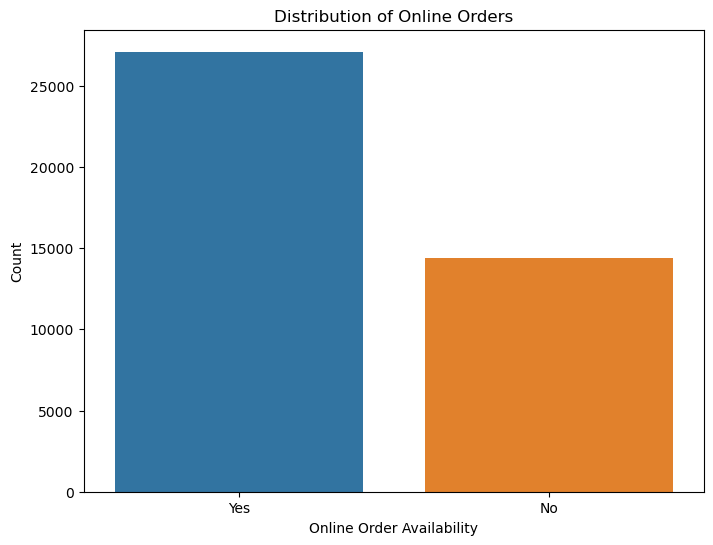

In [33]:

# Countplot for 'online_order' column
plt.figure(figsize=(8, 6))
sns.countplot(data=Zomato_dataset, x='online_order')
plt.title('Distribution of Online Orders')
plt.xlabel('Online Order Availability')
plt.ylabel('Count')
plt.show()


Based on this observation, it appears that there are more restaurants in your dataset that offer online orders ("Yes" - > 25,000) compared to those that do not ("No" - around 15,000)

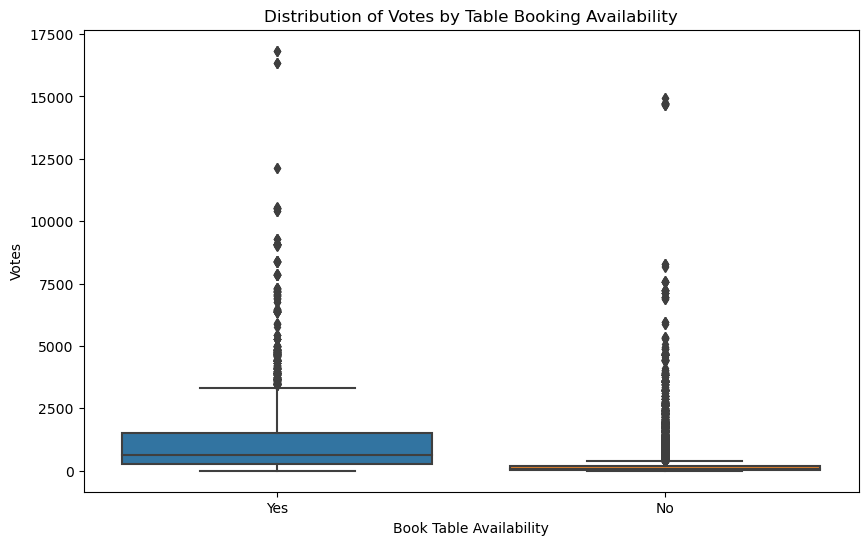

In [34]:
# Box plot for 'book_table' vs. 'votes'
plt.figure(figsize=(10, 6))
sns.boxplot(data=Zomato_dataset, x='book_table', y='votes')
plt.title('Distribution of Votes by Table Booking Availability')
plt.xlabel('Book Table Availability')
plt.ylabel('Votes')
plt.show()


For restaurants that offer table booking ('Yes'), there is a wider spread in terms of the number of votes they receive. This indicates variability in vote counts among these restaurants.
For restaurants that do not offer table booking ('No'), the distribution of vote counts is narrower, suggesting less variability among these restaurants.

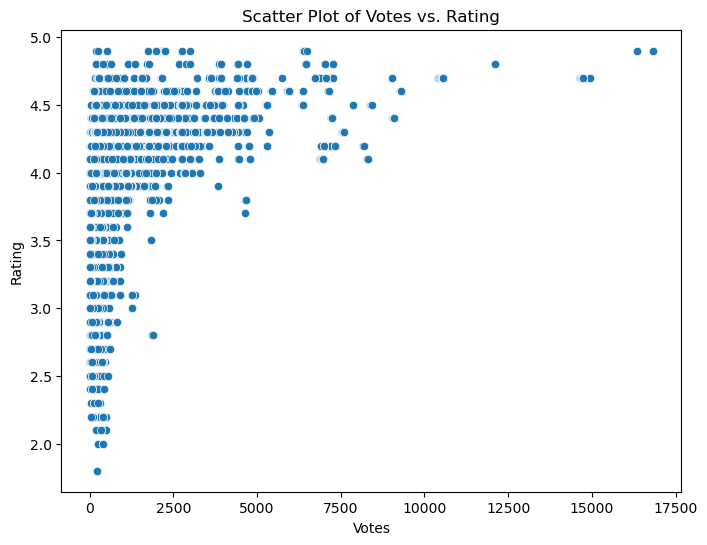

In [35]:
# Scatter plot for 'votes' vs. 'rate'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Zomato_dataset, x='votes', y='rate')
plt.title('Scatter Plot of Votes vs. Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()


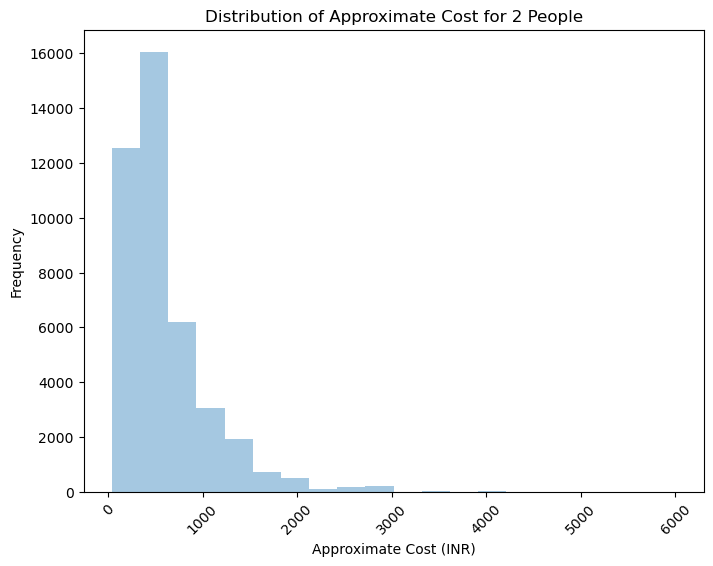

In [36]:
# Histogram for 'approx_cost_for_2_People' using sns.distplot
plt.figure(figsize=(8, 6))
sns.distplot(Zomato_dataset['approx_cost_for_2_People'].dropna(), bins=20, kde=False)
plt.title('Distribution of Approximate Cost for 2 People')
plt.xlabel('Approximate Cost (INR)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Affordable Options: The peak in the 0 to 100 INR range suggests that a significant portion of the restaurants in your dataset offer affordable dining options for two people.

Skewness: The rightward skewness indicates that while many restaurants offer low-cost options, there are fewer restaurants with higher approximate costs. This is a common pattern in pricing data, where there are more options at lower price points.

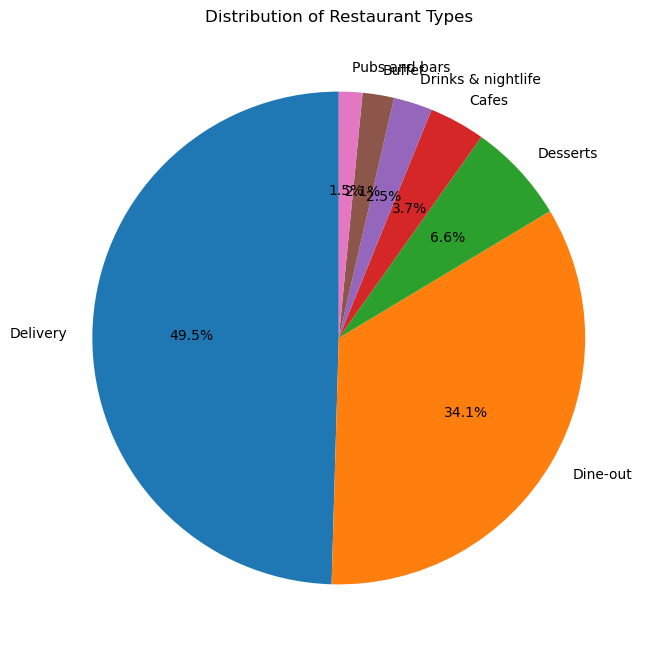

In [37]:
# Pie chart for 'Resturant_type'
restaurant_type_counts = Zomato_dataset['Resturant_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(restaurant_type_counts, labels=restaurant_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Restaurant Types')
plt.show()


The pie chart illustrates that "delivery" and "dine out" are the two dominant restaurant types in your dataset, accounting for a significant portion of the restaurants.

Number of Resturant in the City

Text(0.5, 1.0, 'NO. of restaurants in a city')

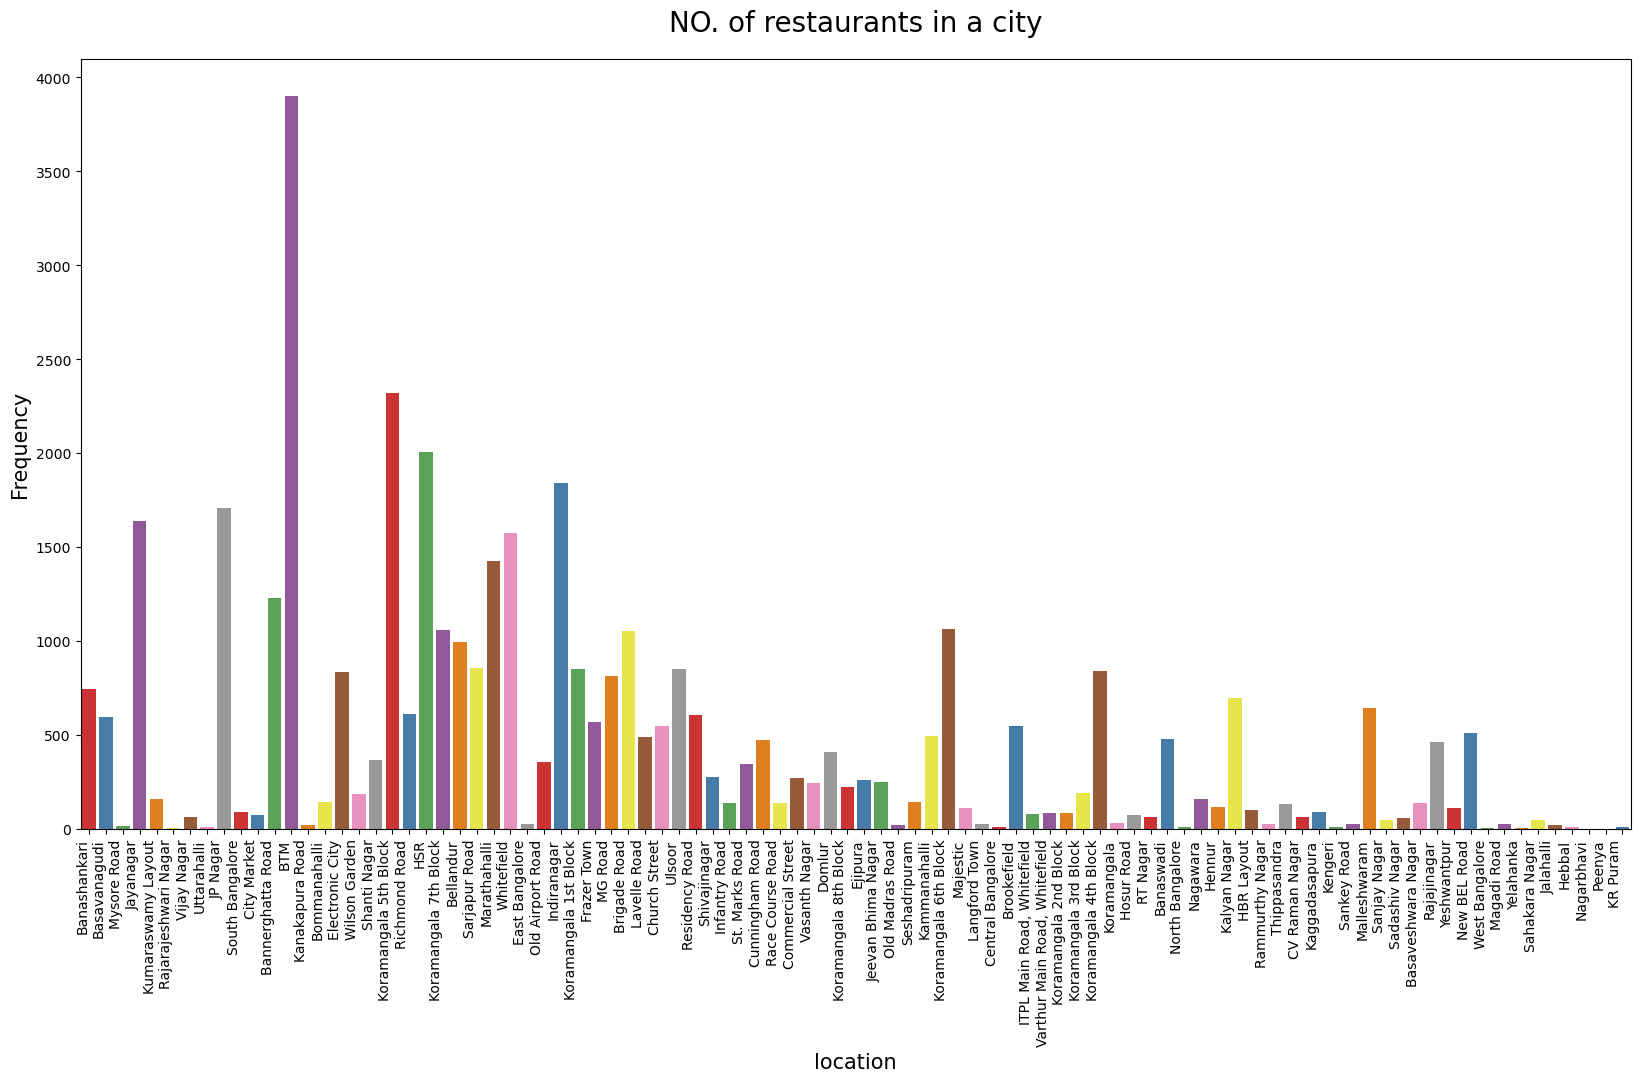

In [39]:
#Number of Resturant in the City
fig = plt.figure(figsize=(20,10))
loc = sns.countplot(x="location",data=Zomato_dataset, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("location",size=15)
loc
plt.title('NO. of restaurants in a city',size = 20,pad=20)

# Top 20 famouse Resturants

Text(0.5, 0, 'Number of outlets')

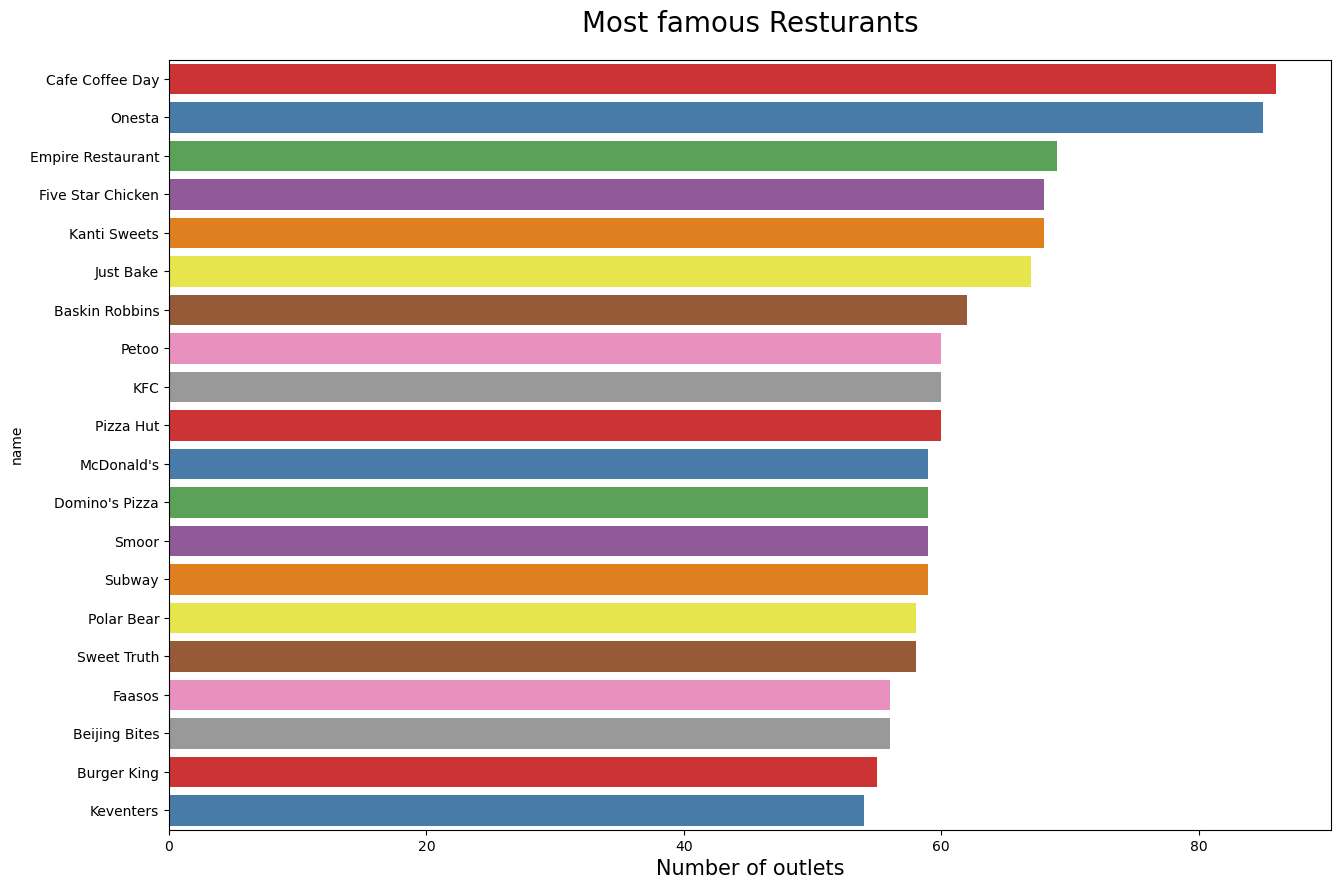

In [40]:
plt.figure(figsize=(15,10))
Resturant_Name=Zomato_dataset['name'].value_counts()[:20]
sns.barplot(x=Resturant_Name,y=Resturant_Name.index,palette='Set1')
plt.title("Most famous Resturants",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

In [41]:
Zomato_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41505 entries, 0 to 41504
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      41505 non-null  object 
 1   online_order              41505 non-null  object 
 2   book_table                41505 non-null  object 
 3   rate                      41505 non-null  float64
 4   votes                     41505 non-null  int64  
 5   location                  41505 non-null  object 
 6   rest_type                 41505 non-null  object 
 7   cuisines                  41505 non-null  object 
 8   approx_cost_for_2_People  41505 non-null  float64
 9   Resturant_type            41505 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.2+ MB


# Convert the categorical data to the numerical data

In [42]:
from sklearn.preprocessing import LabelEncoder
lable=LabelEncoder()
New_df=Zomato_dataset.copy()
New_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost_for_2_People,Resturant_type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [43]:
list1=['name','online_order','book_table','location','rest_type','cuisines','Resturant_type']
for i in list1:
    New_df[i]=lable.fit_transform(New_df[i])

New_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost_for_2_People,Resturant_type
0,2787,1,1,4.1,775,1,24,1901,800.0,0
1,5288,1,0,4.1,787,1,24,819,800.0,0
2,4898,1,0,3.8,918,1,19,656,800.0,0
3,139,0,0,3.7,88,1,73,2228,300.0,0
4,2256,0,0,3.8,166,4,24,1928,600.0,0


In [44]:
# Calculate the correlation matrix
corr_matrix = New_df.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

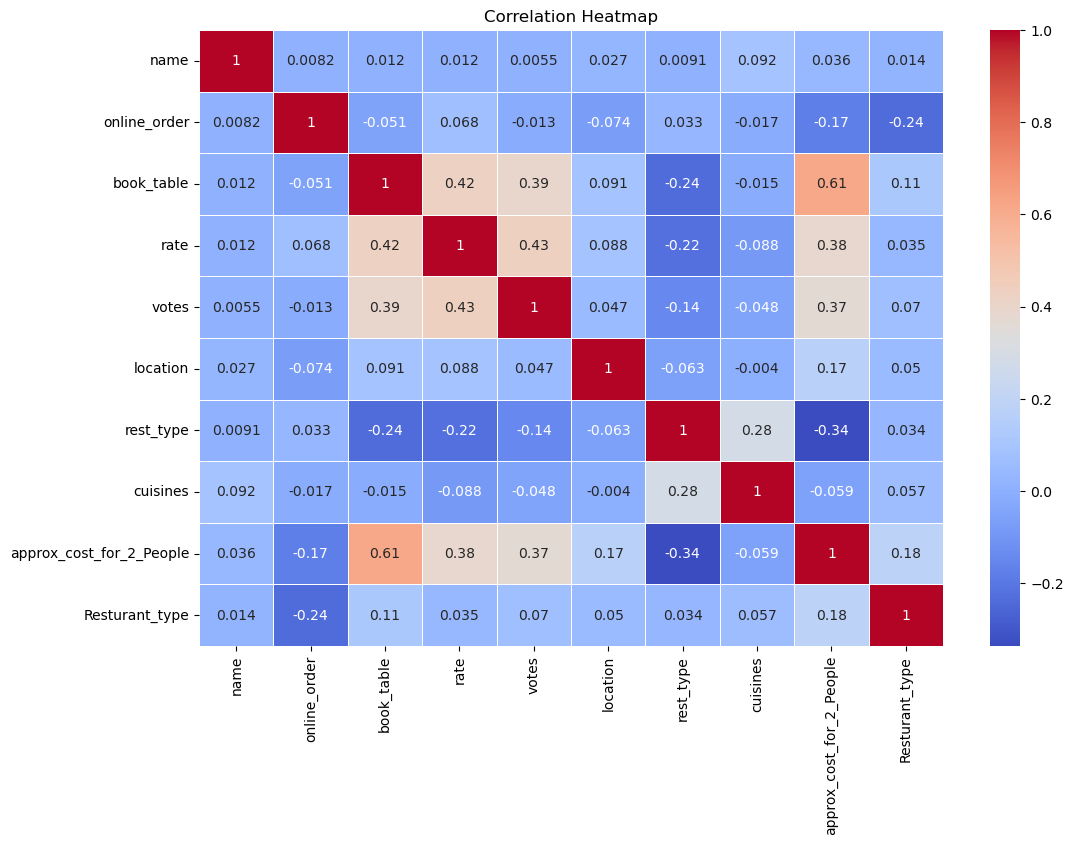

In [45]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

In [46]:
corr_matrix

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost_for_2_People,Resturant_type
name,1.000000,0.008173,0.012402,0.011519,0.005471,0.026984,0.009051,0.091632,0.036157,0.014496
online_order,0.008173,1.000000,-0.051106,0.067970,-0.013153,-0.073988,0.032755,-0.017322,-0.174681,-0.237520
book_table,0.012402,-0.051106,1.000000,0.424626,0.392249,0.091459,-0.241058,-0.014772,0.613975,0.113782
rate,0.011519,0.067970,0.424626,1.000000,0.434541,0.088418,-0.223981,-0.087545,0.384403,0.034858
votes,0.005471,-0.013153,0.392249,0.434541,1.000000,0.046854,-0.143550,-0.047831,0.365845,0.069562
location,0.026984,-0.073988,0.091459,0.088418,0.046854,1.000000,-0.063109,-0.004016,0.166594,0.050009
rest_type,0.009051,0.032755,-0.241058,-0.223981,-0.143550,-0.063109,1.000000,0.280441,-0.336124,0.033945
cuisines,0.091632,-0.017322,-0.014772,-0.087545,-0.047831,-0.004016,0.280441,1.000000,-0.059379,0.056616
approx_cost_for_2_People,0.036157,-0.174681,0.613975,0.384403,0.365845,0.166594,-0.336124,-0.059379,1.000000,0.184923
Resturant_type,0.014496,-0.237520,0.113782,0.034858,0.069562,0.050009,0.033945,0.056616,0.184923,1.000000


In [47]:
# Identify columns with low correlation
threshold = 0.1 
low_corr_columns = []
mask = abs(corr_matrix) < threshold
columns_to_drop = [col for col in mask.columns if all(mask[col])]

In [48]:
# Drop the columns with lower correlation
New_df.drop(columns_to_drop, axis=1, inplace=True)

# Display the updated DataFrame
New_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost_for_2_People,Resturant_type
0,2787,1,1,4.1,775,1,24,1901,800.0,0
1,5288,1,0,4.1,787,1,24,819,800.0,0
2,4898,1,0,3.8,918,1,19,656,800.0,0
3,139,0,0,3.7,88,1,73,2228,300.0,0
4,2256,0,0,3.8,166,4,24,1928,600.0,0


# feature scalling

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
X = New_df.drop('rate', axis=1)
y = New_df['rate']

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split the data set into train and test data

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (33204, 9)
X_test shape: (8301, 9)
y_train shape: (33204,)
y_test shape: (8301,)


# Train The Model

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

regression_algorithms = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor()
}

In [54]:
best_algorithm = None
best_mse = float('inf')
best_score = float('inf')
for algorithm_name, algorithm in regression_algorithms.items():
    scores = -cross_val_score(algorithm, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
    mean_mse = np.mean(scores)
    if mean_mse < best_score:
        best_score = mean_mse
        best_algorithm = algorithm_name
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_mse:
        best_mse = mse
        best_algorithm = algorithm_name
print(f"The best regression algorithm is: {best_algorithm}")
print(f"Mean Squared Error (MSE) on cross-validation: {best_score:.2f}")
print("Best Regression Algorithm:", best_algorithm)
print("Mean Squared Error (MSE):", best_mse)

The best regression algorithm is: Random Forest Regression
Mean Squared Error (MSE) on cross-validation: 0.02
Best Regression Algorithm: Random Forest Regression
Mean Squared Error (MSE): 0.010985662175325497


# Train the model with Random Forest

In [58]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [60]:
r2 = r2_score(y_test, y_pred)*100
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 0.01
R-squared (R2) Score: 94.24


# Save The Model

In [61]:
import pickle
model_filename = 'resturant_rating_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(random_forest_model, file)
